2024-09-03 13:33:35 - 🔮 Multi-Average calculation initialized
2024-09-03 13:33:35 - 📊 plot management initialized
Extended time range: 2023-09-28 06:39:30.100000 to 2023-09-28 06:39:35.900000
Requested time range ['2023-09-28/06:39:30.100000', '2023-09-28/06:39:35.900000'] exists within one chunk: 2023-09-28 06:00:00 to 2023-09-28 12:00:00
Loading data from pickle cache: pickle_cache/data_20230928_060000_to_20230928_120000.pkl

Plotting with time range: 2023-09-28/06:39:31.000 to 2023-09-28/06:39:35.000
Number of data points: 1172


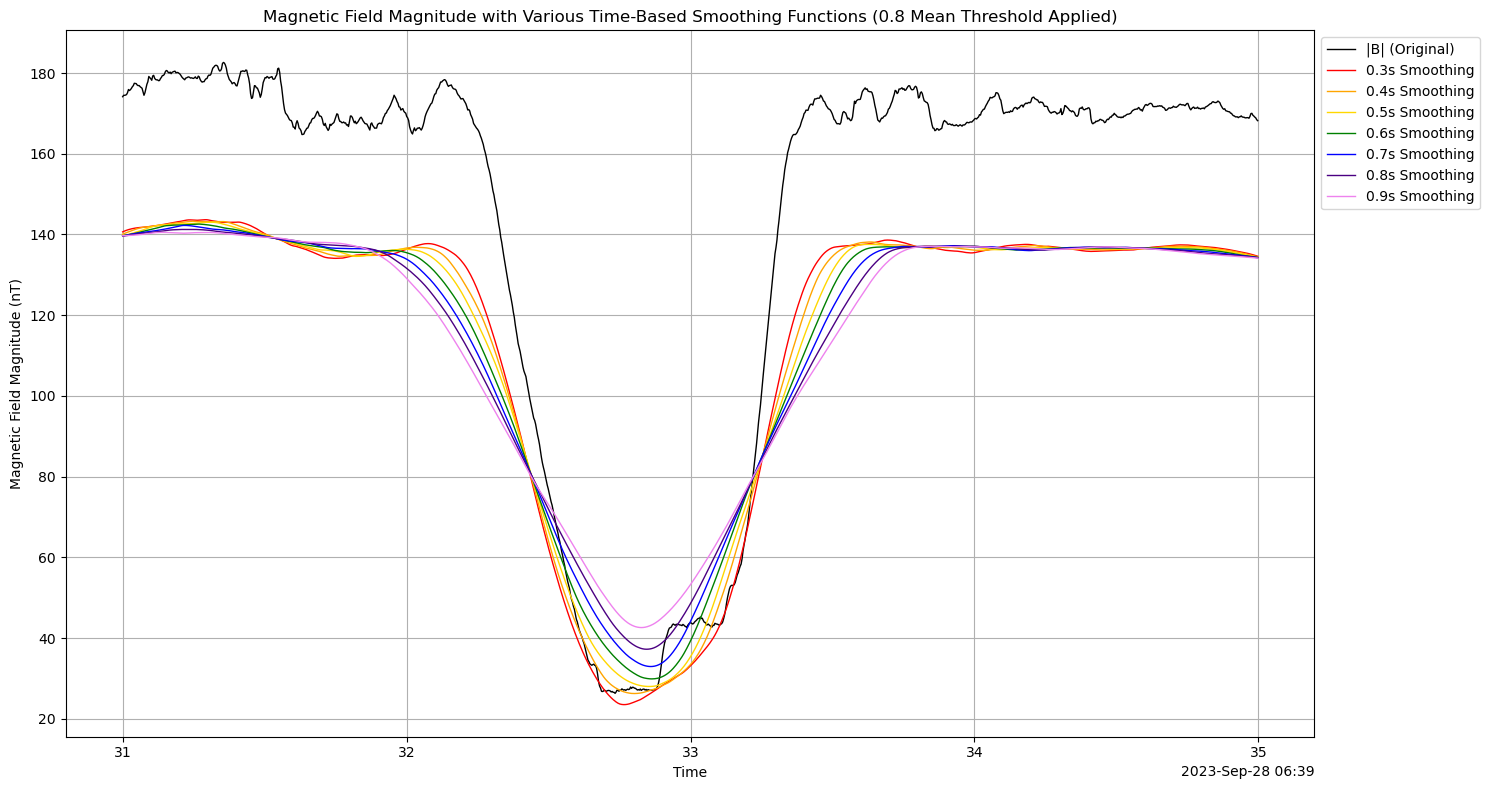

In [8]:
#🔮 MultiAvg main functions 🔮

import importlib

import data_management
from data_management import *

import multiAvg_calc
importlib.reload(multiAvg_calc)
from multiAvg_calc import *

import plotting
importlib.reload(plotting)
from plotting import *

# -------- Meta-Controls -------- #
line_thickness = 1  # Adjust the thickness of all lines
INSTRUMENT_SAMPLING_RATE = 292.9  # Samples per second (adjust as needed)
mean_threshold = .8  # Multiplier for the mean threshold
use_calculated_sampling_rate = 1  # Option to use the calculated sampling rate (1 for True, 0 for False)

fig_height = 8
fig_width = 15

# Example of smoothing windows (adjust these values as needed)
# smoothing_windows = [8, 10, 12, 14, 16, 18, 20]
smoothing_windows = [.3, .4, .5, .6, .7, .8, .9]
# smoothing_windows = [.1, .2, .3, .4, .5, .6, .7]
# smoothing_windows = [.05, .06, .07, .08, .09, .1, .11]

# -------- Set Time Range -------- #
# trange = ['2023-09-28/06:32:50', '2023-09-28/06:32:52']
# trange = ['2023-09-28/06:39:07.000', '2023-09-28/06:39:10.000'] #WONKY WONKS
# trange = ['2023-09-28/06:37:30.000', '2023-09-28/06:37:30.400'] #Interesting Test Case
trange = ['2023-09-28/06:37:00.000', '2023-09-28/06:37:08.000'] #Interesting Test Case
# trange = ['2023-09-28/06:33:00.000', '2023-09-28/06:33:04.000'] #two good examples

# Step 1: Extend the Time Range
max_window_seconds = max(smoothing_windows)
extended_trange = extend_time_range_multiAvg(trange, max_window_seconds)

# Step 2: Download and Prepare Data for Extended Range
times, br, bt, bn, bmag = download_and_prepare_high_res_mag_data(extended_trange)

# Step 3: Determine the sampling rate to use
sampling_rate_to_use = determine_sampling_rate_multiAvg(times, INSTRUMENT_SAMPLING_RATE, use_calculated_sampling_rate)

# Step 4: Apply Smoothing for Each Window and Then Apply Mean Threshold
smoothed_bmag_dict = {}
for window_size_seconds in smoothing_windows:
    smoothed_bmag = efficient_moving_average_multiAvg(times, bmag, window_size_seconds, sampling_rate_to_use)
    smoothed_bmag_dict[window_size_seconds] = smoothed_bmag * mean_threshold  # Apply the mean threshold here

# Step 5: Clip the Smoothed Data to Original Time Range
times_clipped, bmag_clipped = clip_to_original_time_range_multiAvg(times, bmag, trange)
smoothed_bmag_clipped_dict = {}
for window_size_seconds, smoothed_bmag in smoothed_bmag_dict.items():
    _, smoothed_bmag_clipped = clip_to_original_time_range_multiAvg(times, smoothed_bmag, trange)
    smoothed_bmag_clipped_dict[window_size_seconds] = smoothed_bmag_clipped

# Step 6: Plot the Results
plot_magnitude_with_smoothing_multiAvg(times_clipped, bmag_clipped, line_thickness, trange, fig_height, fig_width, smoothed_bmag_clipped_dict, mean_threshold)


Extended time range: 2023-09-28 06:38:42 to 2023-09-28 06:40:28
Requested time range ['2023-09-28/06:38:42.000000', '2023-09-28/06:40:28.000000'] exists within one chunk: 2023-09-28 06:00:00 to 2023-09-28 12:00:00
Loading data from pickle cache: pickle_cache/data_20230928_060000_to_20230928_120000.pkl

Plotting with time range: 2023-09-28/06:39:00.000 to 2023-09-28/06:40:10.000
Number of data points: 20508


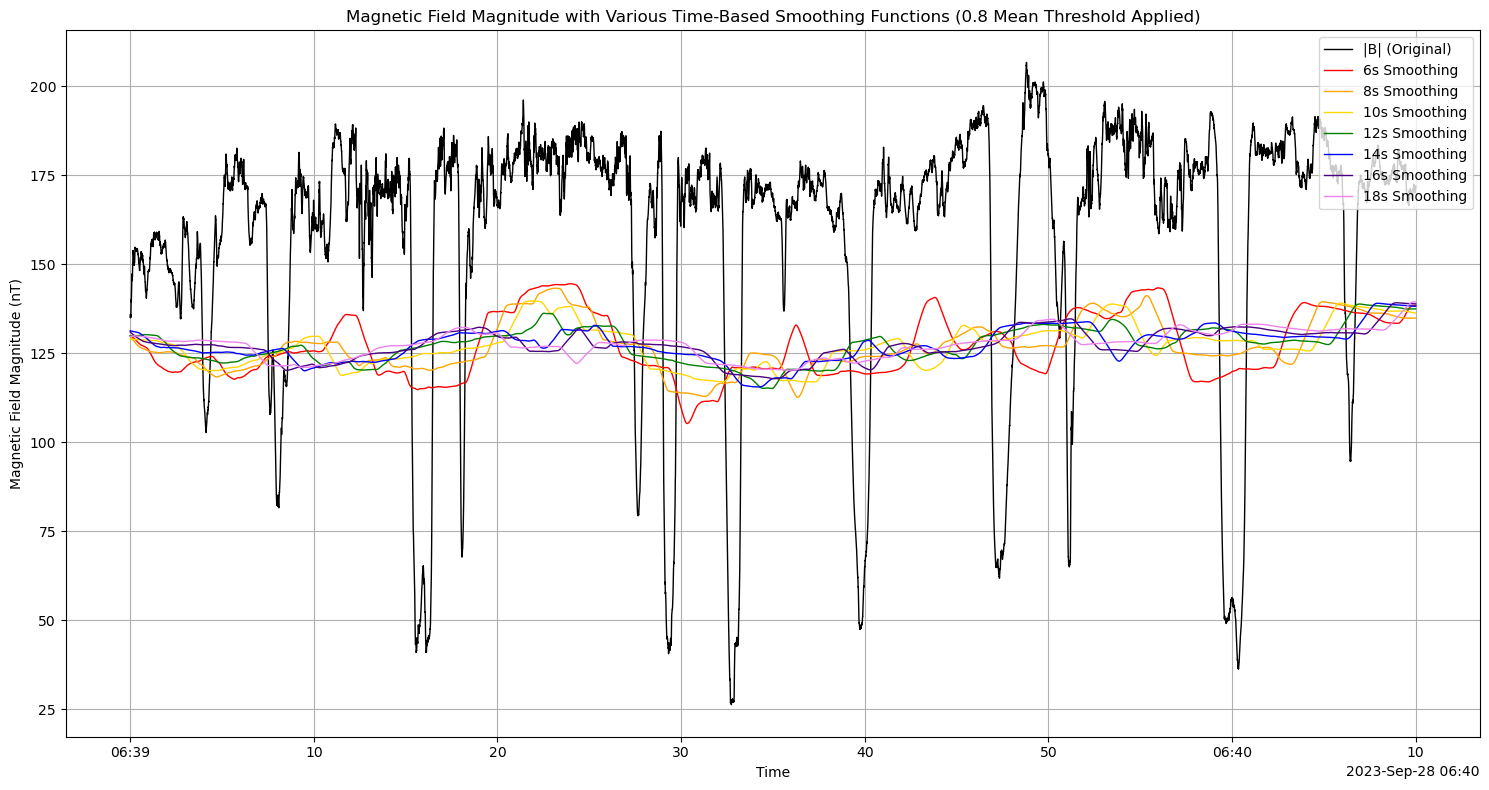

In [26]:
#🔮 MultiAvg main functions 🔮 WORKIN'

# -------- Meta-Controls -------- #
line_thickness = 1  # Adjust the thickness of all lines
INSTRUMENT_SAMPLING_RATE = 292.9  # Samples per second (adjust as needed)
mean_threshold = 0.8  # Multiplier for the mean threshold ORIGINAL
# mean_threshold = 0.9  # Multiplier for the mean threshold
use_calculated_sampling_rate = 1  # Option to use the calculated sampling rate (1 for True, 0 for False)

fig_height = 8
fig_width = 15

# Example of smoothing windows (adjust these values as needed)
smoothing_windows = [6, 8, 10, 12, 14, 16, 18] #LONG SMOOOOOOTH 🐄
# smoothing_windows = [.3, .4, .5, .6, .7, .8, .9]
# smoothing_windows = [1, 3.5, 8]
# smoothing_windows = [.2, .3, .4, .5, .6, .7, .8]
# smoothing_windows = [.1, .2, .3, .4, .5, .6, .7]
# smoothing_windows = [.05, .06, .07, .08, .09, .1, .11]


# -------- Set Time Range -------- #
# trange = ['2023-09-28/06:32:50', '2023-09-28/06:32:52']
# trange = ['2023-09-28/06:33:00', '2023-09-28/06:33:04'] #two good examples
# trange = ['2023-09-28/06:57:25', '2023-09-28/06:57:30'] #Great complex region
# trange = ['2023-09-28/06:53:00', '2023-09-28/06:54:00'] #long many crossings
# trange = ['2023-09-28/06:38:28', '2023-09-28/06:38:45'] #helpful multi dips
# trange = ['2023-09-28/06:29:00', '2023-09-28/06:30:00'] #Drops on a downward slope
# trange = ['2023-09-28/06:16:30', '2023-09-28/06:17:30'] #Drops on a downward slope
# trange = ['2023-09-28/06:15:35', '2023-09-28/06:15:40'] #An EPIC drop
# trange = ['2023-09-28/06:34:53', '2023-09-28/06:35:00']  # Messy Range
# trange = ['2023-09-28/06:39:31.000', '2023-09-28/06:39:35.000'] #⭐️⭐️⭐️ PERFECT Single hole for testing
trange = ['2023-09-28/06:39:00.000', '2023-09-28/06:40:10.000'] #⭐️⭐️⭐️ GREAT region for solid hole testing⭐️⭐️⭐️

# trange = ['2023-09-28/06:36:35', '2023-09-28/06:37:00'] # GREAT Testing region
# trange = ['2023-09-28/06:36:46', '2023-09-28/06:36:50'] # GREAT WILD Testing region, works with no before after avg, OMG
# trange = ['2023-09-28/06:36:50', '2023-09-28/06:37:00'] #Also a WTF moment
# trange = ['2023-09-28/06:37:00', '2023-09-28/06:37:20'] #Also a WTF moment

# Step 1: Extend the Time Range
max_window_seconds = max(smoothing_windows)
extended_trange = extend_time_range_multiAvg(trange, max_window_seconds)

# Step 2: Download and Prepare Data for Extended Range
times, br, bt, bn, bmag = download_and_prepare_high_res_mag_data(extended_trange)

# Step 3: Determine the sampling rate to use
sampling_rate_to_use = determine_sampling_rate_multiAvg(times, INSTRUMENT_SAMPLING_RATE, use_calculated_sampling_rate)

# Step 4: Apply Smoothing for Each Window and Then Apply Mean Threshold
smoothed_bmag_dict = {}
for window_size_seconds in smoothing_windows:
    smoothed_bmag = efficient_moving_average_multiAvg(times, bmag, window_size_seconds, sampling_rate_to_use)
    smoothed_bmag_dict[window_size_seconds] = smoothed_bmag * mean_threshold  # Apply the mean threshold here

# Step 5: Clip the Smoothed Data to Original Time Range
times_clipped, bmag_clipped = clip_to_original_time_range_multiAvg(times, bmag, trange)
smoothed_bmag_clipped_dict = {}
for window_size_seconds, smoothed_bmag in smoothed_bmag_dict.items():
    _, smoothed_bmag_clipped = clip_to_original_time_range_multiAvg(times, smoothed_bmag, trange)
    smoothed_bmag_clipped_dict[window_size_seconds] = smoothed_bmag_clipped

# Step 6: Plot the Results
plot_magnitude_with_smoothing_multiAvg(times_clipped, bmag_clipped, line_thickness, trange, fig_height, fig_width, smoothed_bmag_clipped_dict, mean_threshold)


2024-08-30 15:59:51 - 📊 plot management initialized
time range without MS detected
Extended time range: 2023-09-28 06:34:49.300000 to 2023-09-28 06:35:00.700000
Requested time range ['2023-09-28/06:34:49.300000', '2023-09-28/06:35:00.700000'] exists within one chunk: 2023-09-28 06:00:00 to 2023-09-28 12:00:00
Loading data from pickle cache: pickle_cache/data_20230928_060000_to_20230928_120000.pkl
📈Called Plot With Derivatives in plotting.py
Computed moving average with 10-second window:
Computed moving average with 0.1-second window:
Computed moving average with 0.2-second window:
Computed moving average with 0.3-second window:
Computed moving average with 0.4-second window:
Computed moving average with 0.5-second window:
Computed moving average with 0.6-second window:
Computed moving average with 0.7-second window:
Computed moving average with 0.1-second window:
Computed moving average with 0.2-second window:
Computed moving average with 0.3-second window:
Computed moving average with

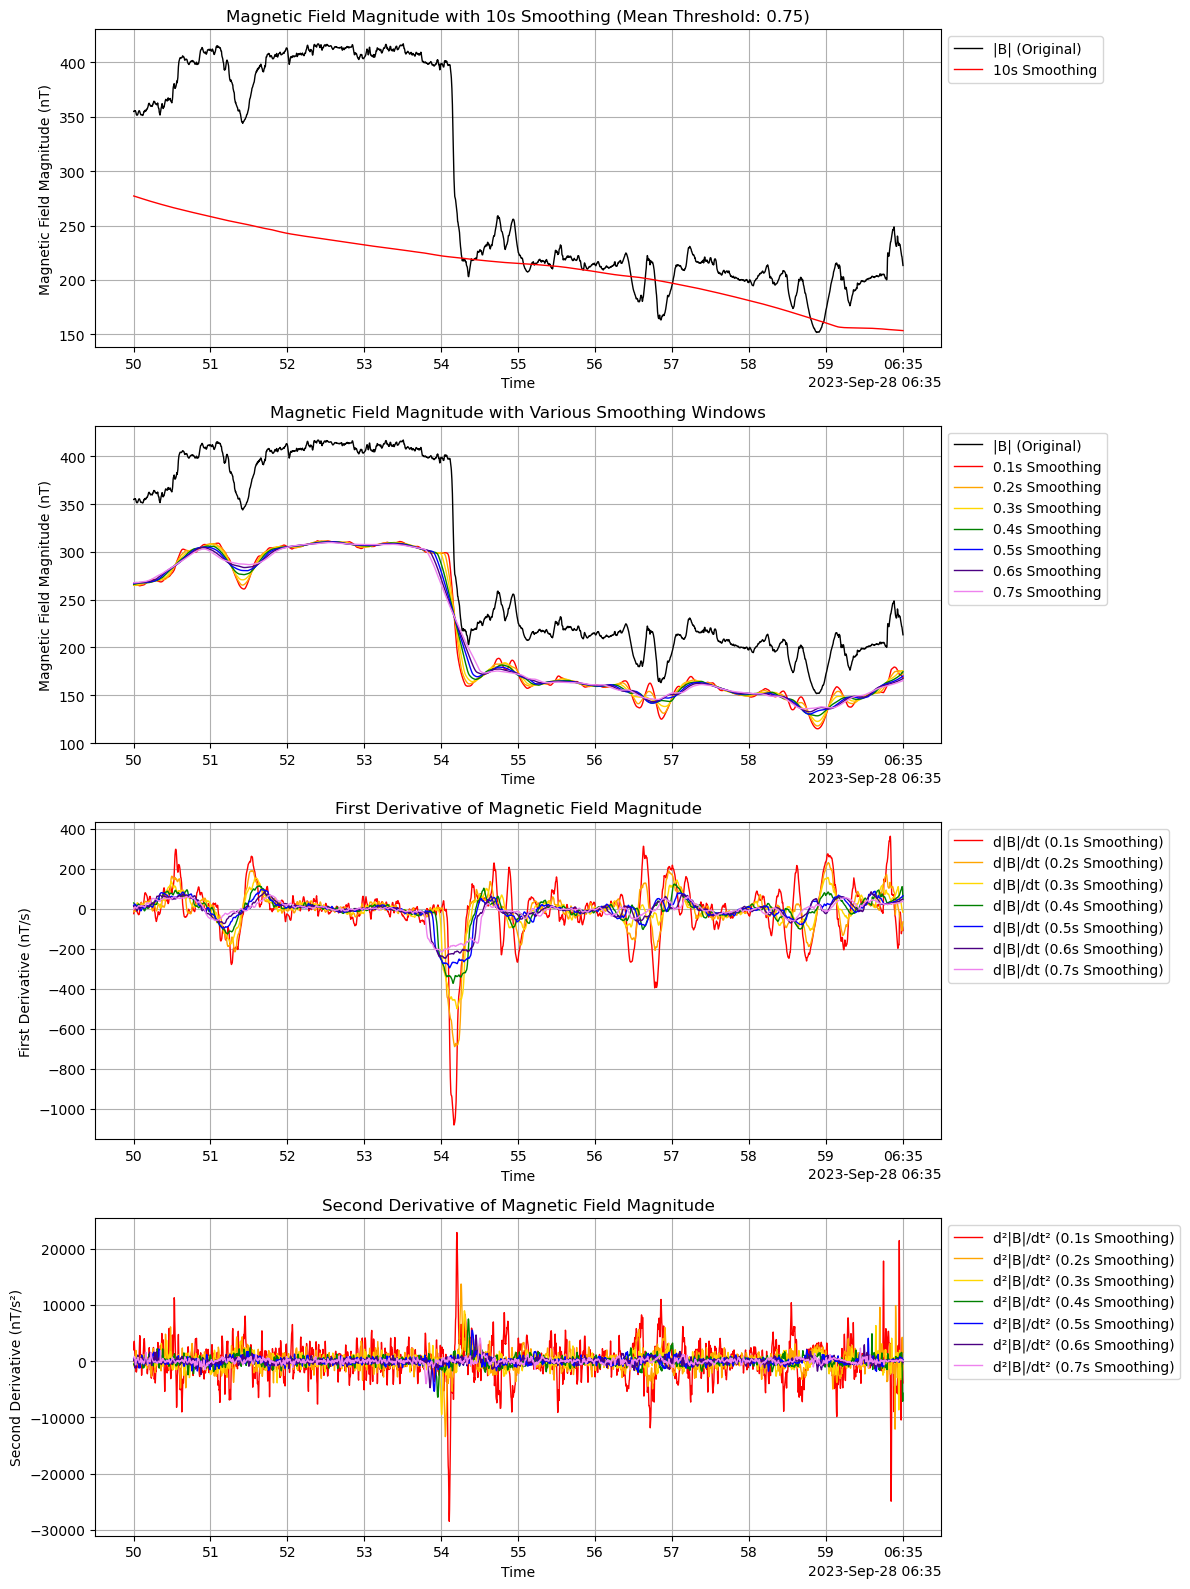

In [3]:
import plotting
importlib.reload(plotting)
from plotting import *

#Smooth Plotting with Derivatives 😎
# -------- Meta-Controls -------- #
line_thickness = 1  # Adjust the thickness of all lines
INSTRUMENT_SAMPLING_RATE = 292.9  # Samples per second (adjust as needed)
mean_threshold = 0.75  # Multiplier for the mean threshold
use_calculated_sampling_rate = 1  # Option to use the calculated sampling rate (1 for True, 0 for False)


# -------- Smoothing Windows -------- #
# smoothing_windows = [.02, .04, .06, .08, .1, .12, .14]
# smoothing_windows = [.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
# smoothing_windows = [.25, .5, .75, 1, 1.25, 1.5, 1.75]
smoothing_windows = [.1, .2, .3, .4, .5, .6, .7]
# smoothing_windows = [.05, .1, .15, .2, .25, .3, .35]
# smoothing_windows = [.01, .02, .03, .04, .05, .06, .07]
# smoothing_windows = [.02, .04, .06, .08, .1, .12, .14]
# smoothing_windows = [.04, .05, .06, .07, .08, .09, .1]

trange = ['2023-09-28/06:34:50', '2023-09-28/06:35:00']  # Messy Range

# -------- Determine Time Range -------- #
max_window_seconds = max(smoothing_windows)  # Determine the largest smoothing window
extended_trange = extend_time_range(trange, max_window_seconds)  # Extend the time range to account for the largest smoothing window
times, br, bt, bn, bmag = download_and_prepare_high_res_mag_data(extended_trange)  # Download and prepare the data for the extended time range

# -------- Clip to Original Time Range -------- #

times_clipped, bmag_clipped = clip_to_original_time_range(times, bmag, trange)  # Clip the smoothed results to the original time range

# -------- Determine Sampling Rate -------- #
sampling_rate_to_use = determine_sampling_rate(times, INSTRUMENT_SAMPLING_RATE, use_calculated_sampling_rate)  # Determine the sampling rate to use

# -------- Example Usage for Derivatives -------- #
# plot_derivatives_for_smoothing_windows(times_clipped, bmag_clipped, smoothing_windows, sampling_rate_to_use, line_thickness, mean_threshold)  # Plot the derivatives for the smoothed data
plot_with_derivatives(times_clipped, bmag_clipped, smoothing_windows, sampling_rate_to_use, line_thickness, mean_threshold)  # Plot the derivatives for the smoothed data
